#### TRAIN AND TEST BOTH ON SYNTHETIC DATA 


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93        80
           1       0.96      0.95      0.95       120

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



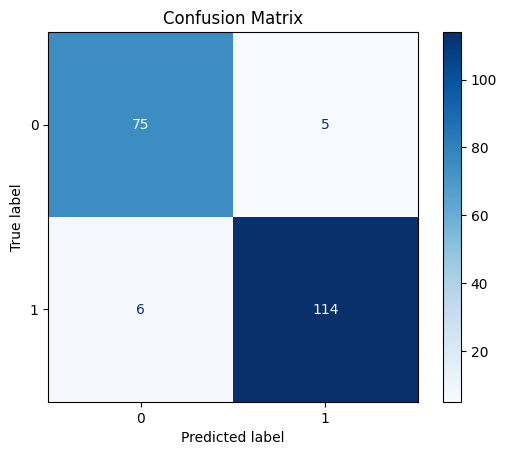

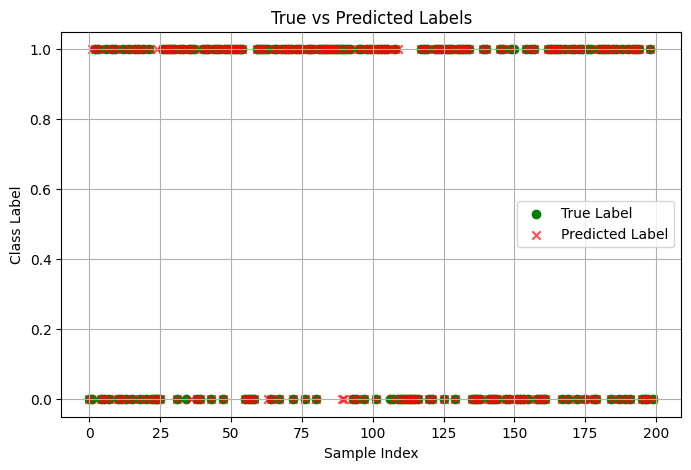

In [10]:
import pandas as pd
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('samples_1000_CTGAN.csv')
#df_test = pd.read_csv('test_set.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define the GPC with an RBF kernel
kernel = C(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Fit the model
gpc.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = gpc.predict(X_test_scaled)

# # Show results
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(gpc, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='green', marker='o', label='True Label')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted Label', alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("True vs Predicted Labels")
plt.legend()
plt.grid(True)
plt.show()


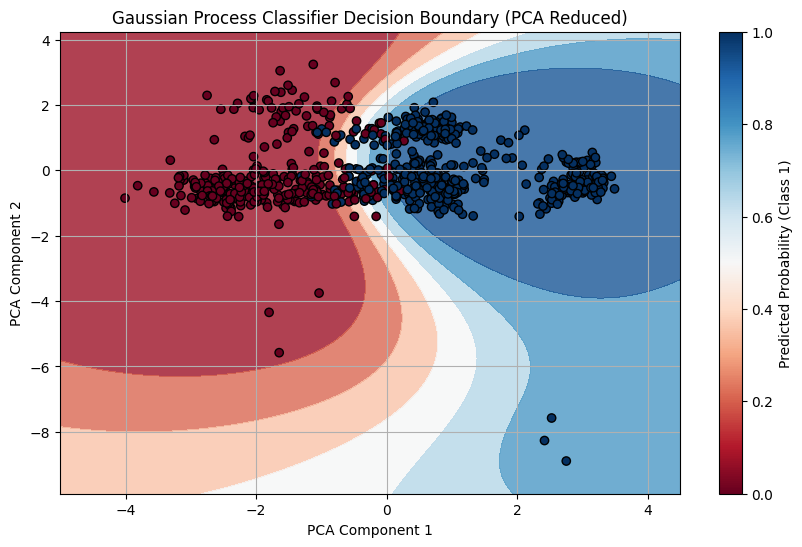

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train GPC on the 2D PCA-reduced data
kernel = C(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc.fit(X_train_pca, y_train)

# Create a mesh grid for decision boundary visualization
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = gpc.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, probs, cmap="RdBu", alpha=0.8)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="RdBu", edgecolors='k')
plt.colorbar(label="Predicted Probability (Class 1)")
plt.title("Gaussian Process Classifier Decision Boundary (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


#### TRAIN - SYNTHETIC DATA (1000 Data Points) & TEST - TEST DATA (33 Data Points)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.81      1.00      0.90        22

    accuracy                           0.85        34
   macro avg       0.91      0.79      0.82        34
weighted avg       0.88      0.85      0.84        34



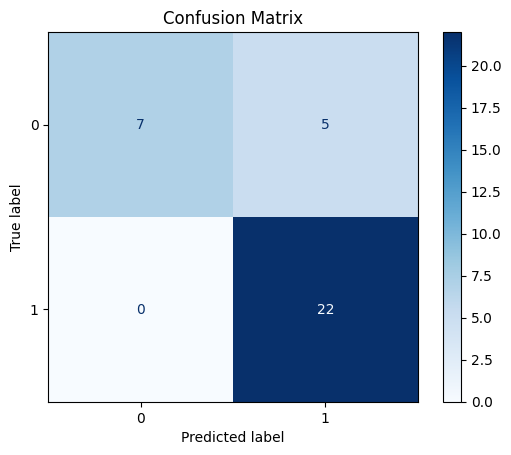

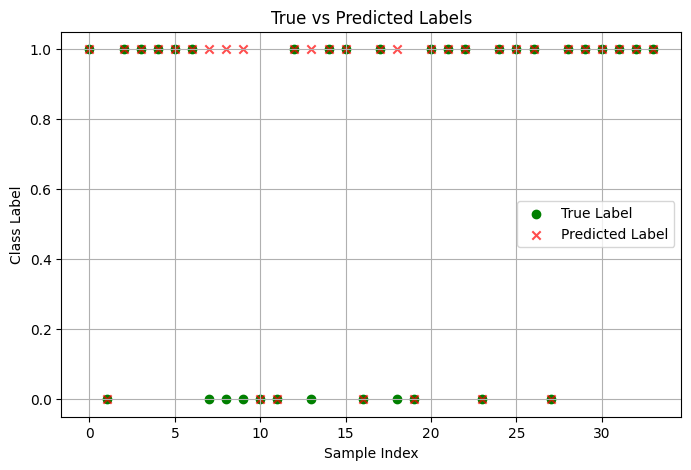

In [7]:
import pandas as pd
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('samples_1000_CTGAN.csv')
df_test = pd.read_csv('test_set.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

X_train = X
y_train = y
X_test = df_test.drop(columns=["Possibility of formation"])
y_test = df_test["Possibility of formation"]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define the GPC with an RBF kernel
kernel = C(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Fit the model
gpc.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = gpc.predict(X_test_scaled)

# # Show results
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(gpc, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='green', marker='o', label='True Label')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted Label', alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("True vs Predicted Labels")
plt.legend()
plt.grid(True)
plt.show()


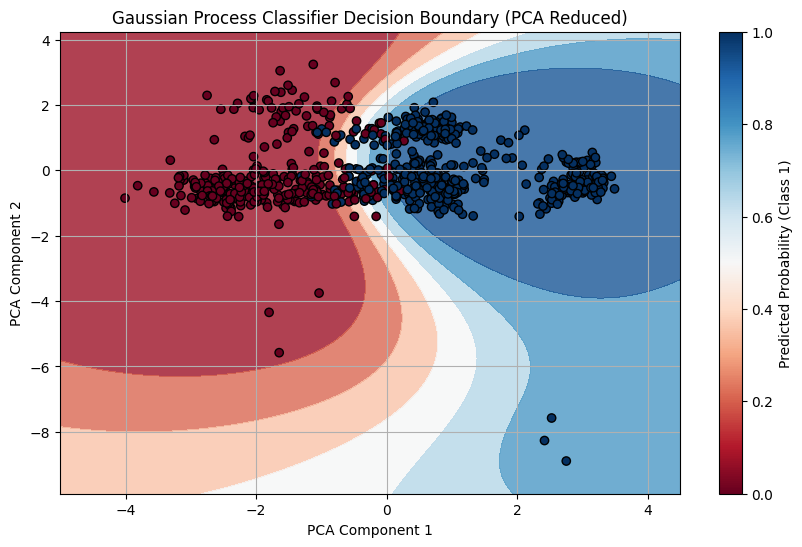

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train GPC on the 2D PCA-reduced data
kernel = C(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc.fit(X_train_pca, y_train)

# Create a mesh grid for decision boundary visualization
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = gpc.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, probs, cmap="RdBu", alpha=0.8)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="RdBu", edgecolors='k')
plt.colorbar(label="Predicted Probability (Class 1)")
plt.title("Gaussian Process Classifier Decision Boundary (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


#### TRAIN ON SYNTHETIC DATA (1000 Data Points) && TEST ON - SUPPLEMENTARY DATA (37 Data Points) 


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.81      1.00      0.89        21

    accuracy                           0.86        37
   macro avg       0.90      0.84      0.85        37
weighted avg       0.89      0.86      0.86        37



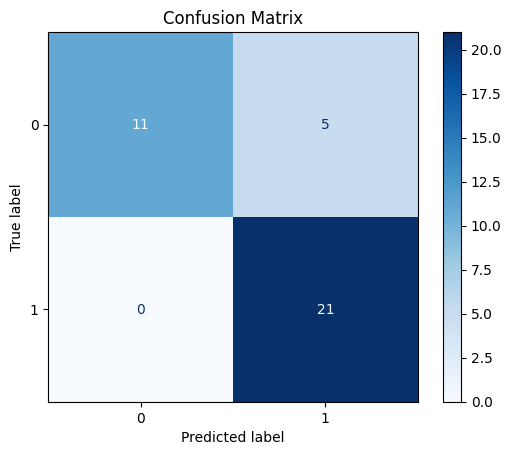

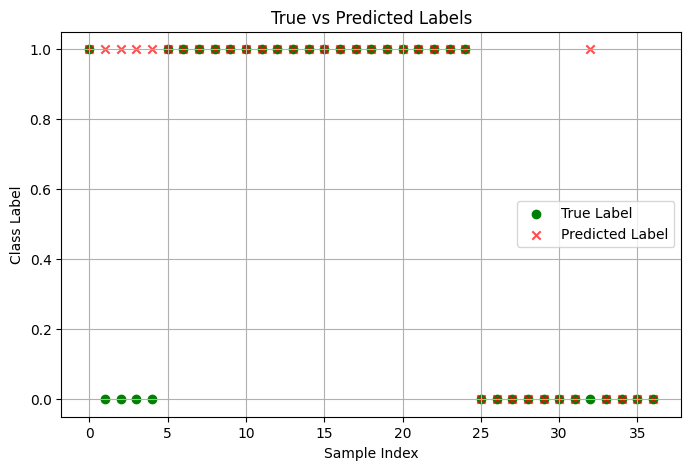

In [13]:
import pandas as pd
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('samples_1000_CTGAN.csv')
df_test = pd.read_csv('supplementary.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

X_train = X
y_train = y
X_test = df_test.drop(columns=["Possibility of formation"])
y_test = df_test["Possibility of formation"]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define the GPC with an RBF kernel
kernel = C(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Fit the model
gpc.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = gpc.predict(X_test_scaled)

# # Show results
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(gpc, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='green', marker='o', label='True Label')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted Label', alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("True vs Predicted Labels")
plt.legend()
plt.grid(True)
plt.show()


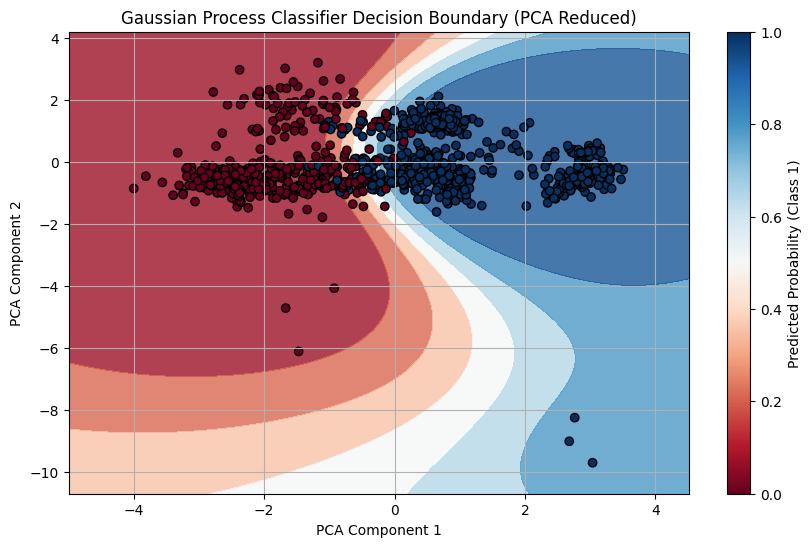

In [14]:
# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train GPC on the 2D PCA-reduced data
kernel = C(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc.fit(X_train_pca, y_train)

# Create a mesh grid for decision boundary visualization
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = gpc.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, probs, cmap="RdBu", alpha=0.8)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="RdBu", edgecolors='k')
plt.colorbar(label="Predicted Probability (Class 1)")
plt.title("Gaussian Process Classifier Decision Boundary (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


#### TRAIN SET - Train Data (100 Data Points) & Test Data () 


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.88      0.95      0.91        22

    accuracy                           0.88        34
   macro avg       0.89      0.85      0.87        34
weighted avg       0.88      0.88      0.88        34



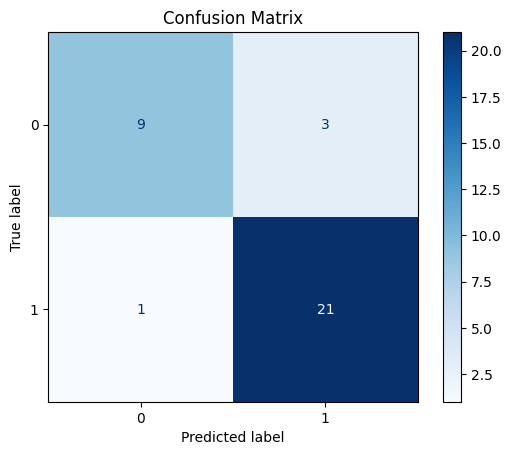

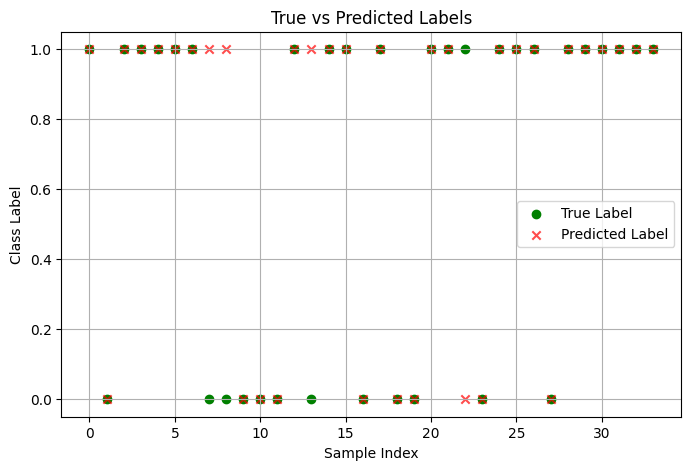

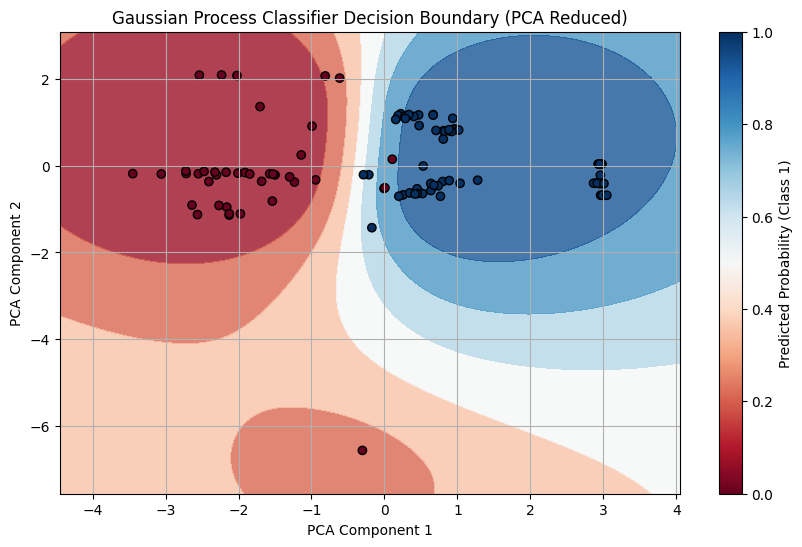

In [15]:
import pandas as pd
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

X_train = X
y_train = y
X_test = df_test.drop(columns=["Possibility of formation"])
y_test = df_test["Possibility of formation"]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define the GPC with an RBF kernel
kernel = C(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Fit the model
gpc.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = gpc.predict(X_test_scaled)

# # Show results
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(gpc, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='green', marker='o', label='True Label')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted Label', alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("True vs Predicted Labels")
plt.legend()
plt.grid(True)
plt.show()

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train GPC on the 2D PCA-reduced data
kernel = C(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc.fit(X_train_pca, y_train)

# Create a mesh grid for decision boundary visualization
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = gpc.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, probs, cmap="RdBu", alpha=0.8)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="RdBu", edgecolors='k')
plt.colorbar(label="Predicted Probability (Class 1)")
plt.title("Gaussian Process Classifier Decision Boundary (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()
